Guia 5 - Proceso AR

In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [76]:
# Generamos 100 numeros aleatorios que van a actuar como Ruido Blanco con distribucion normal estandar

n = 100
aleatorios = np.random.standard_normal(n)

In [77]:
# Generamos un proceso AR(1)

def proceso_ar(rho, y_prev, error):
    return rho * y_prev + error

def simular_proceso_ar(rho, n):
    y = np.zeros(n)
    y[0] = aleatorios[0] # el primer valor siempre va a ser ruido blanco solamente
    
    for i in range(1, n):
        error = aleatorios[i]
        y[i] = proceso_ar(rho, y[i-1], error)
    
    return y

# Primero generamos el AR(1) con rho = 0.5
rho = 0.5
ar_0_5 = simular_proceso_ar(rho, n)

# Primero generamos el AR(1) con rho = 0.9
rho = 0.9
ar_0_9 = simular_proceso_ar(rho, n)

# Juntamos el ruido blanco + los dos AR(1)
df = pd.DataFrame({
    'white_noise':aleatorios, 
    'AR(1)0.5':ar_0_5, 
    'AR(1)0.9':ar_0_9
    })
df.head()

,white_noise,AR(1)0.5,AR(1)0.9
0,-0.291215,-0.291215,-0.291215
1,-1.373581,-1.519189,-1.635674
2,0.235215,-0.524379,-1.236892
3,2.339261,2.077072,1.226059
4,-2.599858,-1.561322,-1.496405


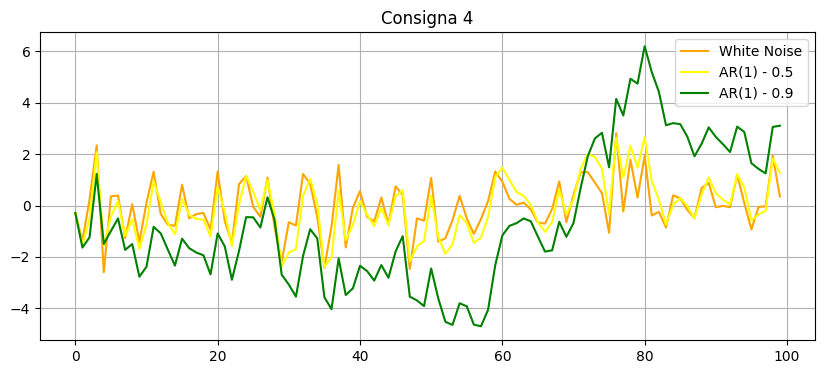

In [78]:
# Grafico comparativo

plt.figure(figsize=(10, 4))
plt.plot(df["white_noise"], label="White Noise", color='orange')
plt.plot(df["AR(1)0.5"], label="AR(1) - 0.5", color='yellow')
plt.plot(df["AR(1)0.9"], label="AR(1) - 0.9", color='green')

plt.title("Consigna 4")
plt.legend()
plt.grid(True)
plt.show()

Al correr varias simulaciones no hay cambios visibles

In [79]:
# Calulamos la media de los 3 procesos
print(f"Media de white noise: {df['white_noise'].mean()}")
print(f"Media de AR(1) 0.5: {df['AR(1)0.5'].mean()}")
print(f"Media de AR(1) 0.9: {df['AR(1)0.9'].mean()}")

Media de white noise: -0.0310531167530488
Media de AR(1) 0.5: -0.07477963512659698
Media de AR(1) 0.9: -0.5897640822224494


Los 3 procesos tienen media ≈ 0. El ruido blanco, basicamente por definición. Y los dos AR(1), (recuerden de la clase que los podemos escribir como un MA infinito, y cada uno de los epsilon tiene esperanza cero) tendrán media igual a cero. 
Noten que si hubiera una constante "c" en el AR(1), la media ya no sería 0. Pero sería constante. Si el proceso autorregresivo es débilmente estacionario, entonces la media existe. En el gráfico podemos apreciar que estos procesos si bien pueden distanciarse de la media, en el tiempo retornan a la media.

In [80]:
# Corremos una regresion para el primer AR(1)

y = df["AR(1)0.5"][1:] # Yt
X = df["AR(1)0.5"].shift(1)[1:] # Yt-1

regmul = sm.OLS(y, X).fit()
regmul.summary()

# Del summary result podemos obtener que el estimador de rho = 0.5441

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               AR(1)0.5   R-squared (uncentered):                   0.199
Model:                            OLS   Adj. R-squared (uncentered):              0.191
Method:                 Least Squares   F-statistic:                              24.32
Date:                Fri, 22 Aug 2025   Prob (F-statistic):                    3.34e-06
Time:                        20:35:56   Log-Likelihood:                         -141.62
No. Observations:                  99   AIC:                                      285.2
Df Residuals:                      98   BIC:                                      287.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AR(1)0.5       0.4486      0.091      4.931      0.000       0.268       0.629
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.259
Skew:                           0.064   Prob(JB):                        0.879
Kurtosis:                       3.215   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Corremos una regresion para el segundo AR(1)

y = df["AR(1)0.9"][1:] # Yt
X = df["AR(1)0.9"].shift(1)[1:] # Yt-1

regmul = sm.OLS(y, X).fit()
regmul.summary()

# Del summary result podemos obtener que el estimador de rho = 0.8660

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               AR(1)0.9   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              593.6
Date:                Fri, 22 Aug 2025   Prob (F-statistic):                    2.26e-43
Time:                        20:35:56   Log-Likelihood:                         -141.41
No. Observations:                  99   AIC:                                      284.8
Df Residuals:                      98   BIC:                                      287.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AR(1)0.9       0.9327      0.038     24.365      0.000       0.857       1.009
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.263
Skew:                           0.035   Prob(JB):                        0.877
Kurtosis:                       3.243   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

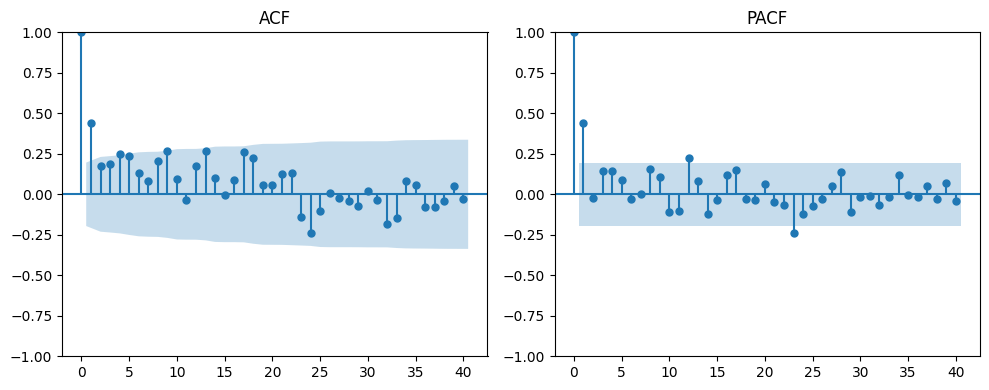

In [82]:
# Graficos el ACF y PACF del primer AR(1)
y = df["AR(1)0.5"]

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plot_acf(y, ax=ax1, lags=40, title=f"ACF")

ax2 = fig.add_subplot(gs[0, 1])
plot_pacf(y, ax=ax2, lags=40, title=f"PACF")

plt.tight_layout()
plt.show()

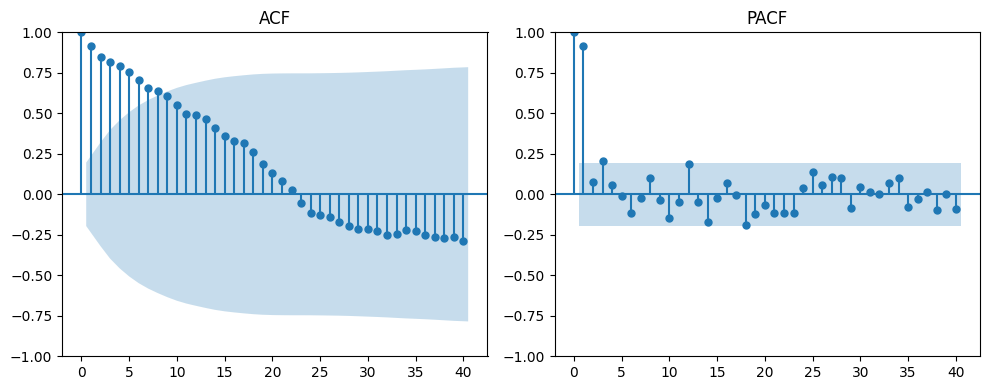

In [83]:
# Graficos el ACF y PACF del primer AR(1)
y = df["AR(1)0.9"]

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plot_acf(y, ax=ax1, lags=40, title=f"ACF")

ax2 = fig.add_subplot(gs[0, 1])
plot_pacf(y, ax=ax2, lags=40, title=f"PACF")

plt.tight_layout()
plt.show()

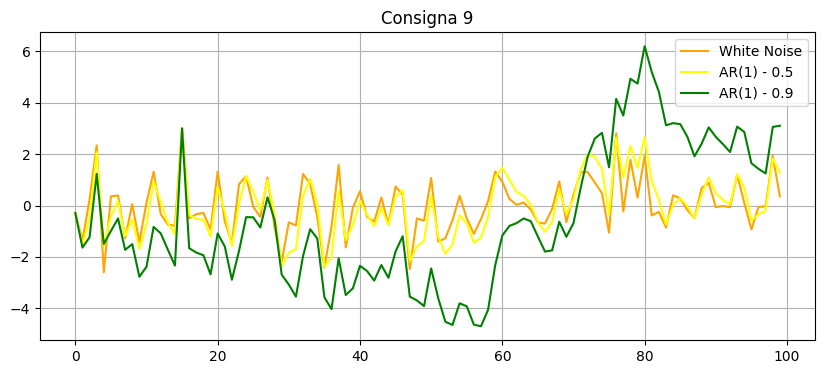

In [ ]:
# Introducimos un shock en el registro 15
df2 = df
df2.iloc[15] = 3

plt.figure(figsize=(10, 4))
plt.plot(df2["white_noise"], label="White Noise", color='orange')
plt.plot(df2["AR(1)0.5"], label="AR(1) - 0.5", color='yellow')
plt.plot(df2["AR(1)0.9"], label="AR(1) - 0.9", color='green')

plt.title("Consigna 9")
plt.legend()
plt.grid(True)
plt.show()

# Lo que podemos apreciar con el shock es que el ruido blanco retorna a la media de manera inmediata
# El AR(1) con rho 0.50 tarda un poco más de tiempo 
# Y el AR(1) con rho 0.90 retorna a la media pero tarda considerablemente más tiempo

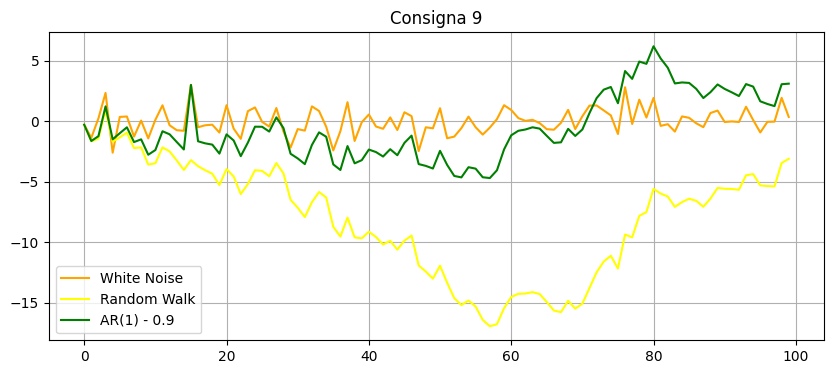

In [ ]:
# Ahora creamos un Random Walk, es decir rho = 1
rho = 1
random_walk = simular_proceso_ar(rho, n)
df['random_walk'] = random_walk

plt.figure(figsize=(10, 4))
plt.plot(df["white_noise"], label="White Noise", color='orange')
plt.plot(df["random_walk"], label="Random Walk", color='yellow')
plt.plot(df["AR(1)0.9"], label="AR(1) - 0.9", color='green')

plt.title("Consigna 9")
plt.legend()
plt.grid(True)
plt.show()

# Lo que se puede apreciar en el grafico es que el Random Walk no retorna la media y es no estacionario